# Multiple Linear Regression

## Importing the libraries

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('medical.csv')


# Data Manipulation

In [ ]:
dataset['bmi_status'] = dataset['bmi'].apply(lambda x : 'high' if x > 29.97 else 'low')
dataset['cluster'] = 2


# EDA

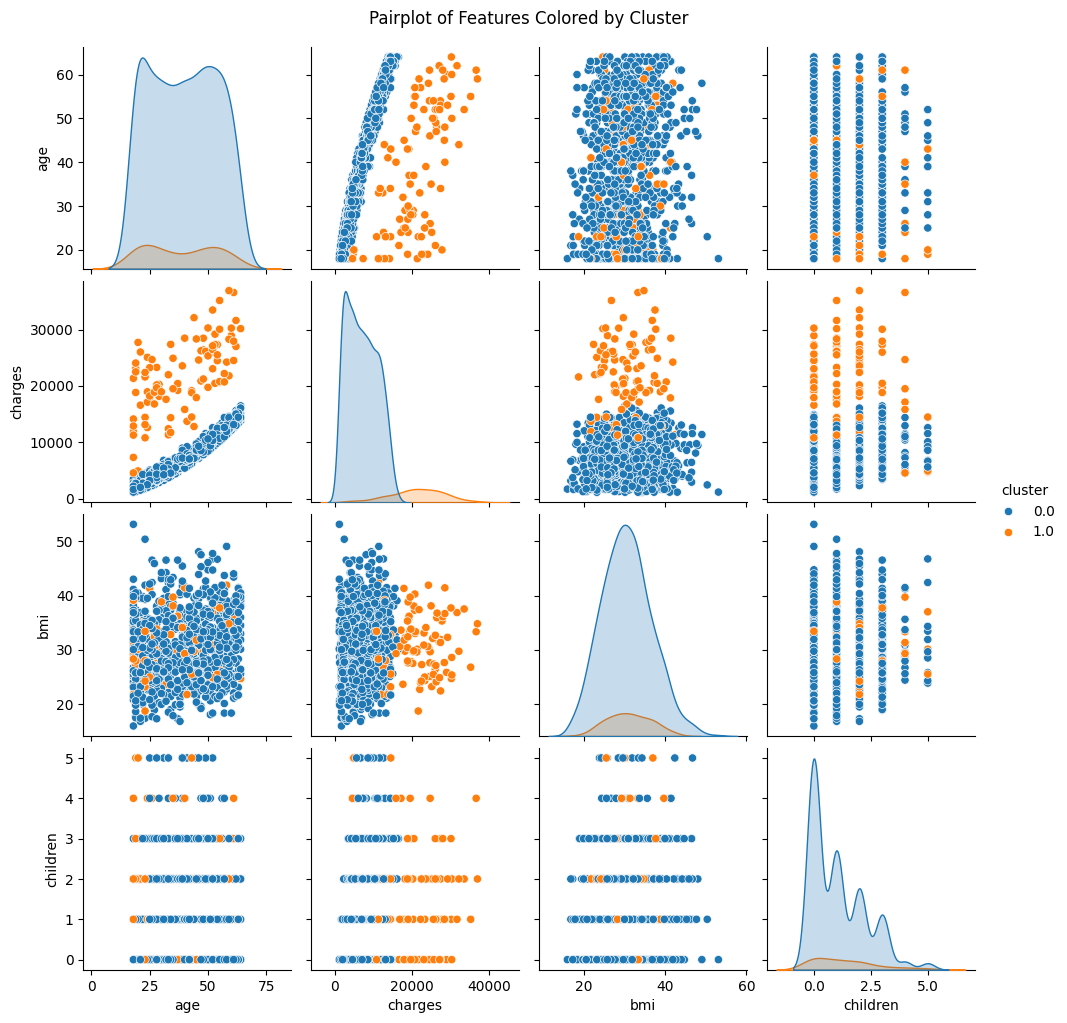

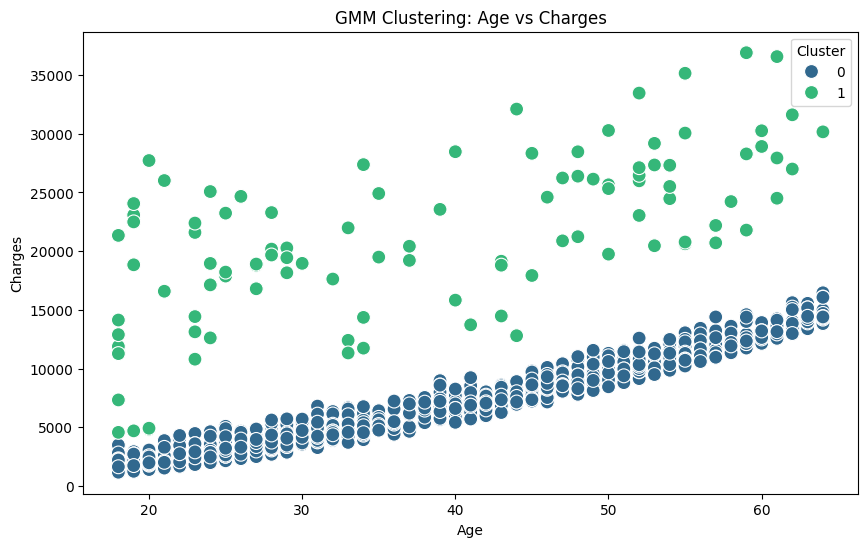

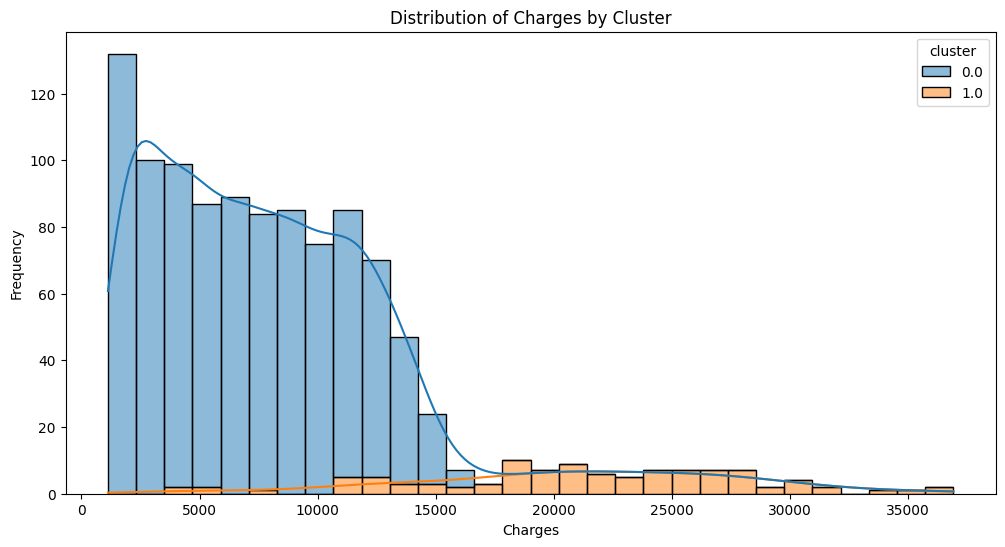

<ipython-input-4-938dcebe55ad>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='cluster', y='charges', palette='Set2')


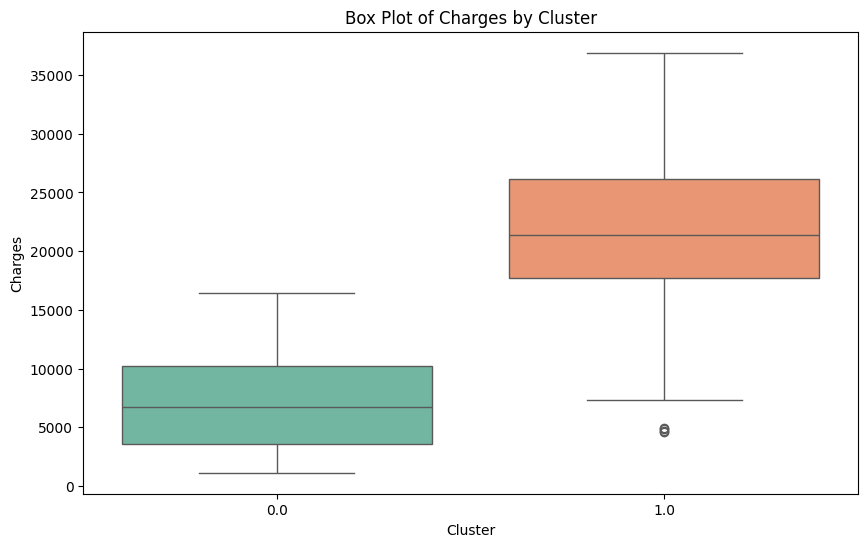

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load the dataset
dataset = pd.read_csv('medical.csv')

# Create a new column for BMI status
dataset['bmi_status'] = dataset['bmi'].apply(lambda x: 'high' if x > 29.97 else 'low')

# Filtering non-smokers
non_smoker = dataset[dataset['smoker'] == 'no']
x_ = non_smoker[['age', 'charges']]

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=2)
non_smoker = non_smoker.copy()
non_smoker['cluster'] = gmm.fit_predict(x_)
dataset.loc[non_smoker.index, 'cluster'] = non_smoker['cluster']

# 1. Pairplot to visualize relationships between features
sns.pairplot(dataset, hue='cluster', vars=['age', 'charges', 'bmi', 'children'])
plt.suptitle('Pairplot of Features Colored by Cluster', y=1.02)
plt.show()

# 2. Cluster Plot of Age vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_smoker, x='age', y='charges', hue='cluster', palette='viridis', s=100)
plt.title('GMM Clustering: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Cluster')
plt.show()

# 3. Histogram of Charges for each cluster
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x='charges', hue='cluster', multiple="stack", kde=True, bins=30)
plt.title('Distribution of Charges by Cluster')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# 4. Box Plot of Charges for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='cluster', y='charges', palette='Set2')
plt.title('Box Plot of Charges by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Charges')
plt.show()


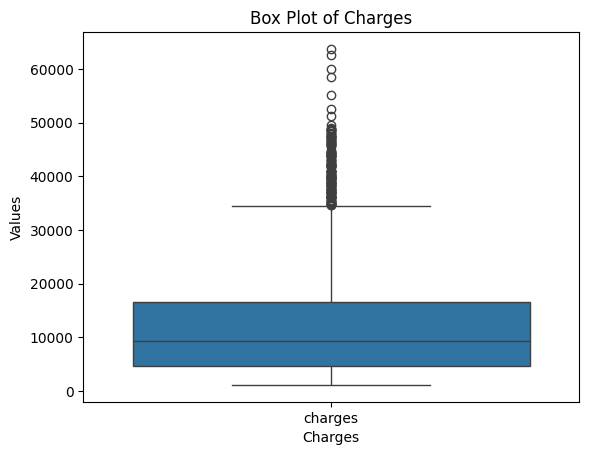

In [ ]:
melted_data = dataset.melt(value_vars=['charges'])
sns.boxplot(x='variable', y='value', data=melted_data)

plt.title('Box Plot of Charges')
plt.xlabel('Charges')
plt.ylabel('Values')
plt.show()

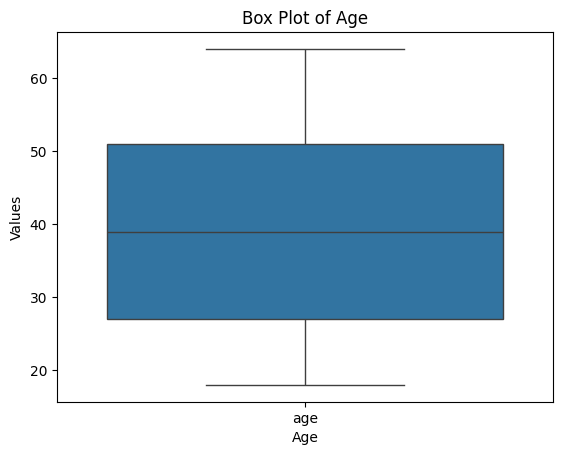

In [ ]:
melted_data = dataset.melt(value_vars=['age'])
sns.boxplot(x='variable', y='value', data=melted_data)

plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

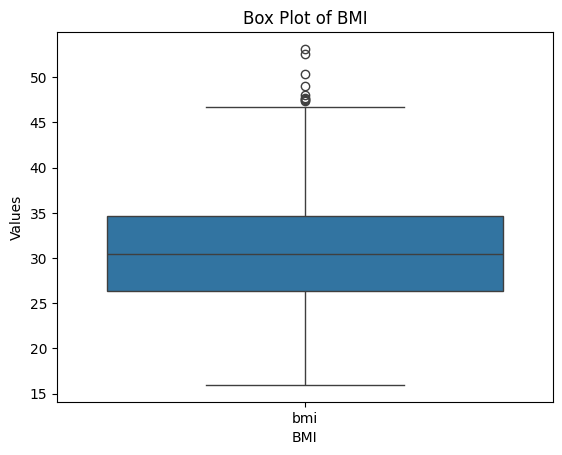

In [ ]:
melted_data = dataset.melt(value_vars=['bmi'])
sns.boxplot(x='variable', y='value', data=melted_data)

plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Values')
plt.show()

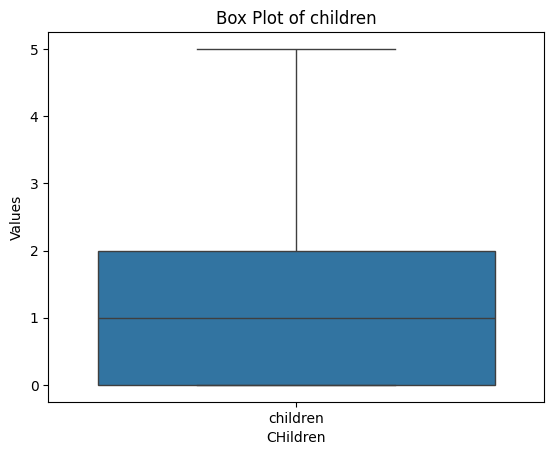

In [ ]:
melted_data = dataset.melt(value_vars=['children'])
sns.boxplot(x='variable', y='value', data=melted_data)

plt.title('Box Plot of children')
plt.xlabel('CHildren')
plt.ylabel('Values')
plt.show()

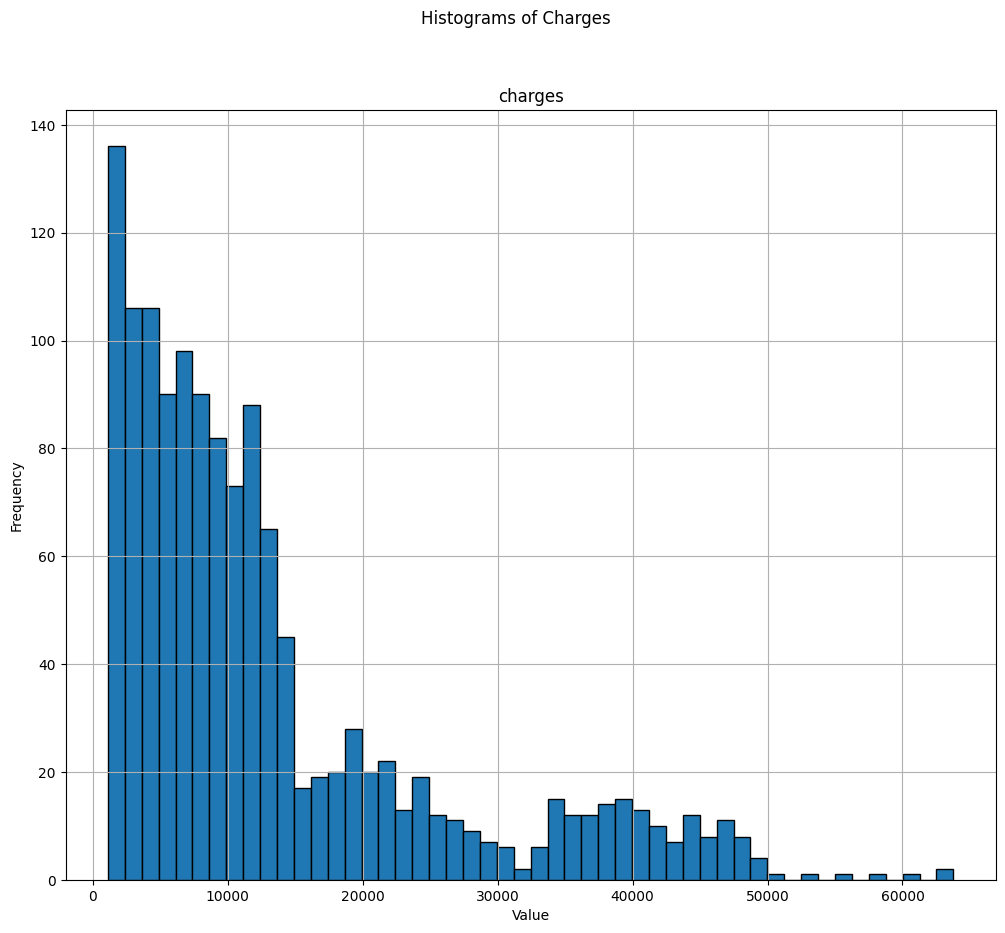

In [ ]:
dataset[['charges']].hist(bins=50, edgecolor='black', figsize=(12, 10))

# Add title and labels
plt.suptitle('Histograms of Charges')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

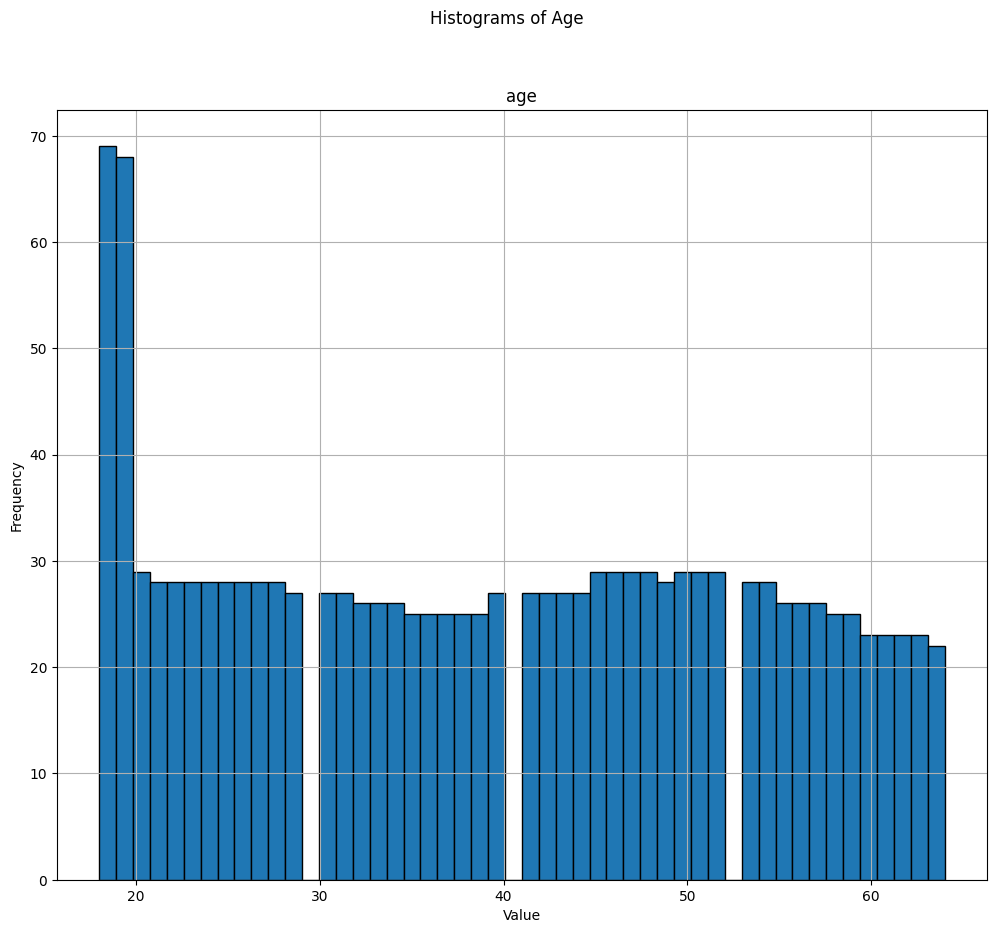

In [ ]:
dataset[['age']].hist(bins=50, edgecolor='black', figsize=(12, 10))

# Add title and labels
plt.suptitle('Histograms of Age')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

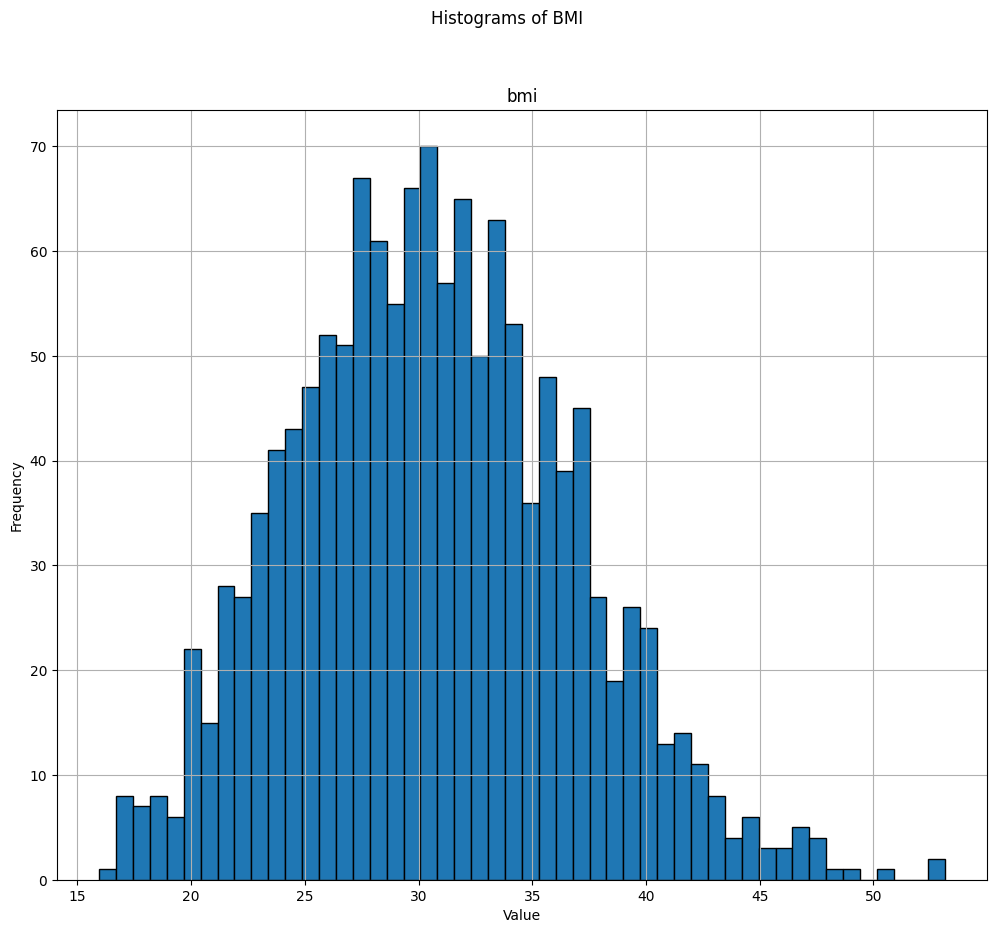

In [ ]:
dataset[['bmi']].hist(bins=50, edgecolor='black', figsize=(12, 10))
# Add title and labels
plt.suptitle('Histograms of BMI')
plt.xlabel('Value')
plt.ylabel('Frequency')
# Show plot
plt.show()

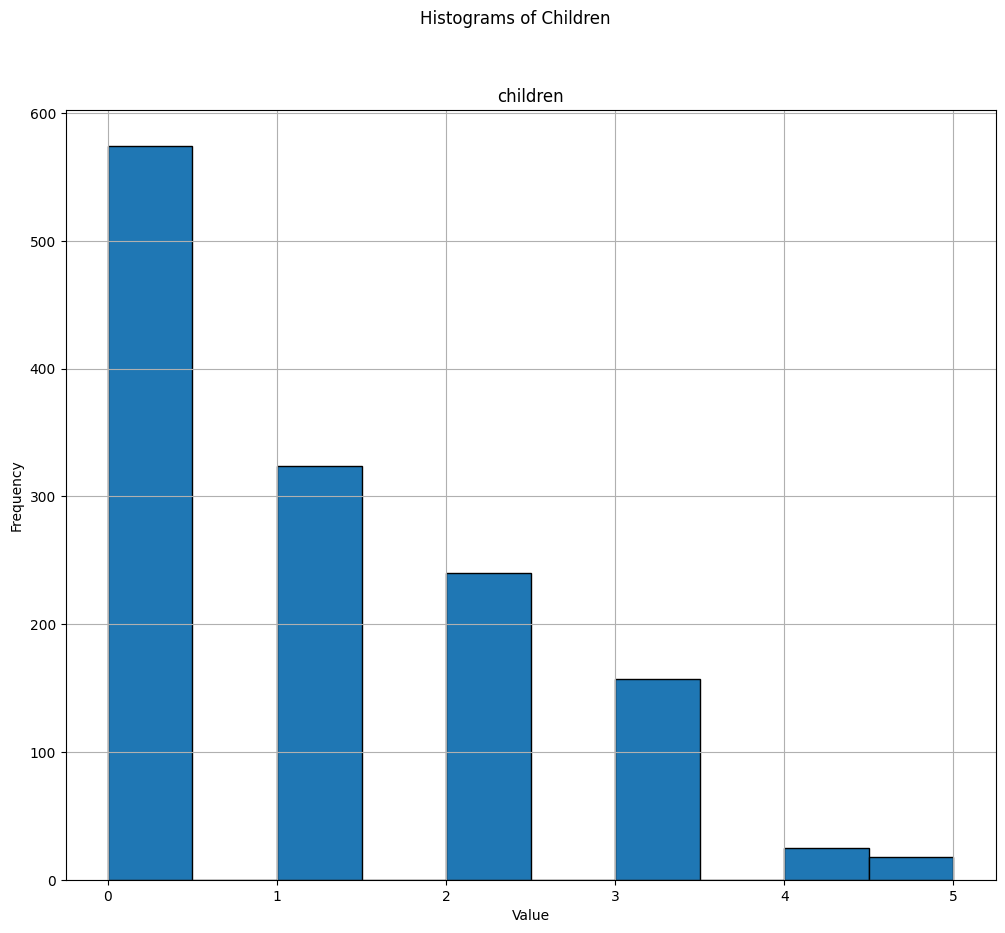

In [ ]:
dataset[['children']].hist(bins=10, edgecolor='black', figsize=(12, 10))

# Add title and labels
plt.suptitle('Histograms of Children')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

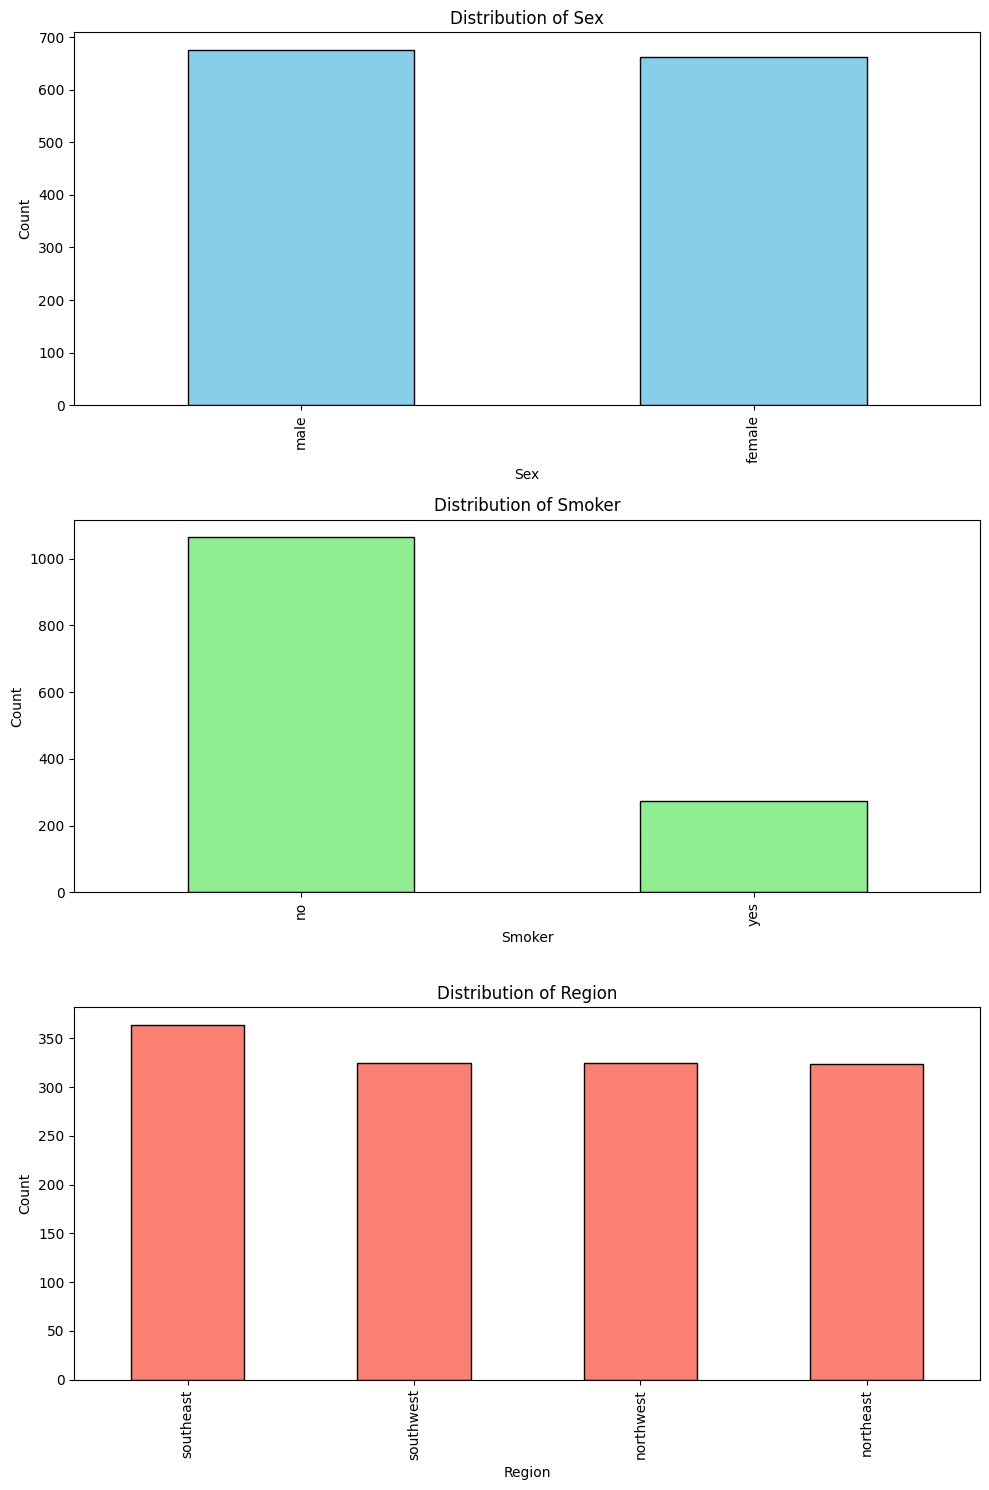

In [ ]:
sex_counts = dataset['sex'].value_counts()
smoker_counts = dataset['smoker'].value_counts()
region_counts = dataset['region'].value_counts()

# Plot bar plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sex_counts.plot(kind='bar', ax=axs[0], color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Sex')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Count')

smoker_counts.plot(kind='bar', ax=axs[1], color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Smoker')
axs[1].set_xlabel('Smoker')
axs[1].set_ylabel('Count')

region_counts.plot(kind='bar', ax=axs[2], color='salmon', edgecolor='black')
axs[2].set_title('Distribution of Region')
axs[2].set_xlabel('Region')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


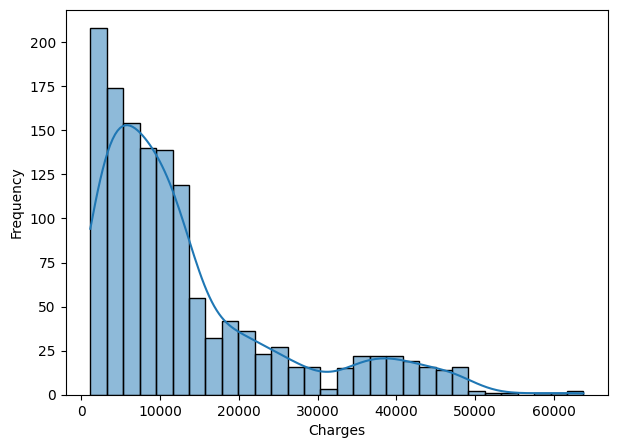

In [ ]:
plt.figure(figsize=(7,5))

# Plot histogram with KDE
sns.histplot(dataset['charges'], kde=True)

# Add labels and title
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.show()

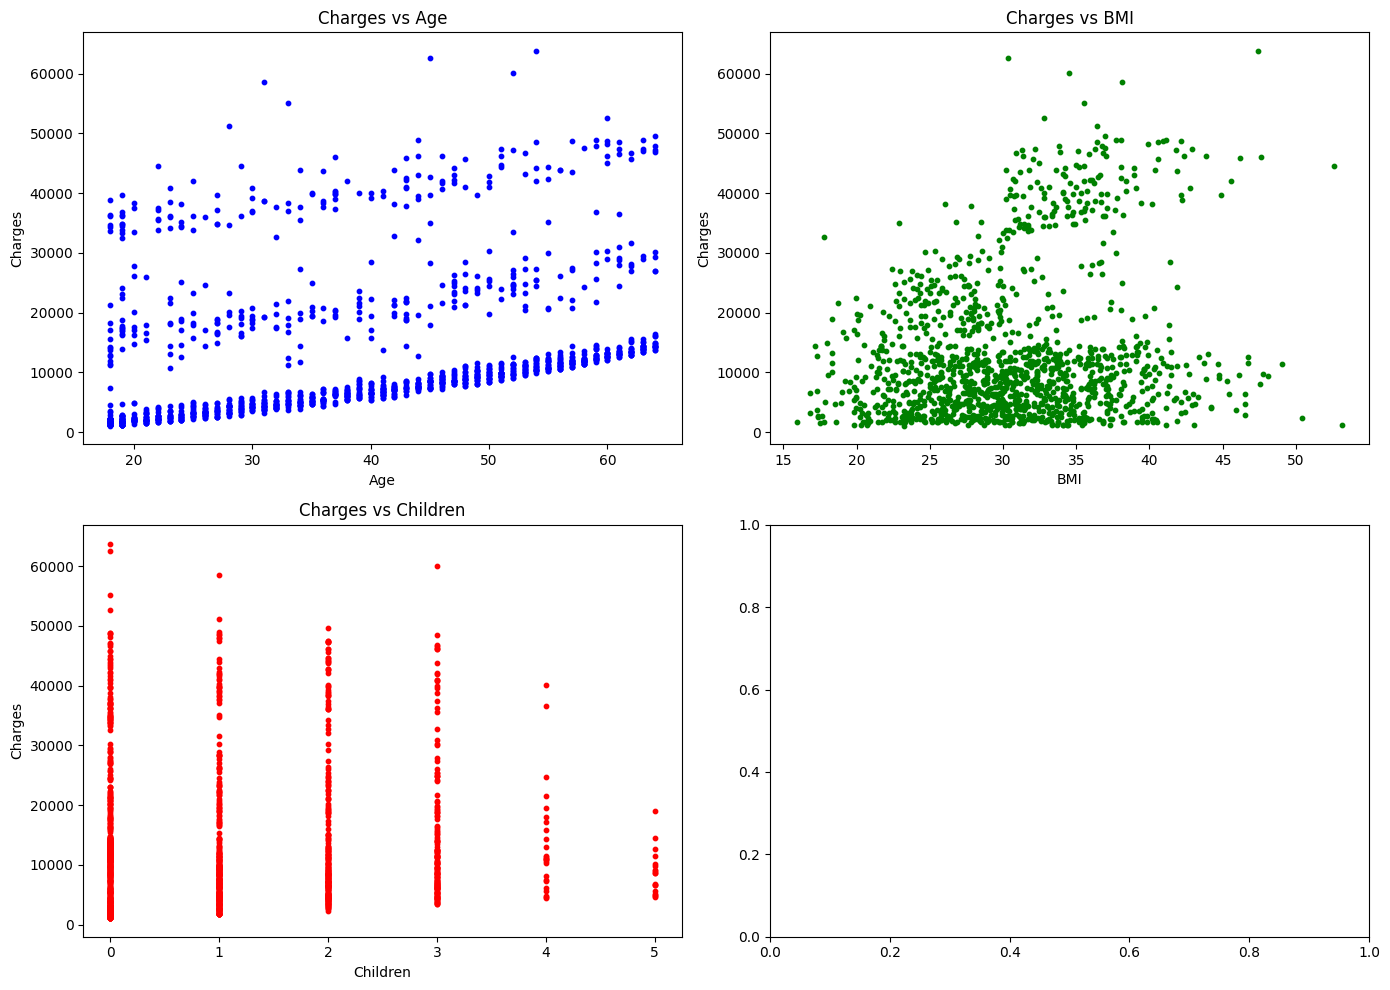

In [ ]:
# Plot scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].scatter(dataset['age'], dataset['charges'], color='blue',s=10)
axs[0, 0].set_title('Charges vs Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Charges')

axs[0, 1].scatter(dataset['bmi'], dataset['charges'], color='green', s=10)
axs[0, 1].set_title('Charges vs BMI')
axs[0, 1].set_xlabel('BMI')
axs[0, 1].set_ylabel('Charges')

axs[1, 0].scatter(dataset['children'], dataset['charges'], color='red', s=10)
axs[1, 0].set_title('Charges vs Children')
axs[1, 0].set_xlabel('Children')
axs[1, 0].set_ylabel('Charges')

# Adjust layout to prevent overlap
plt.tight_layout()

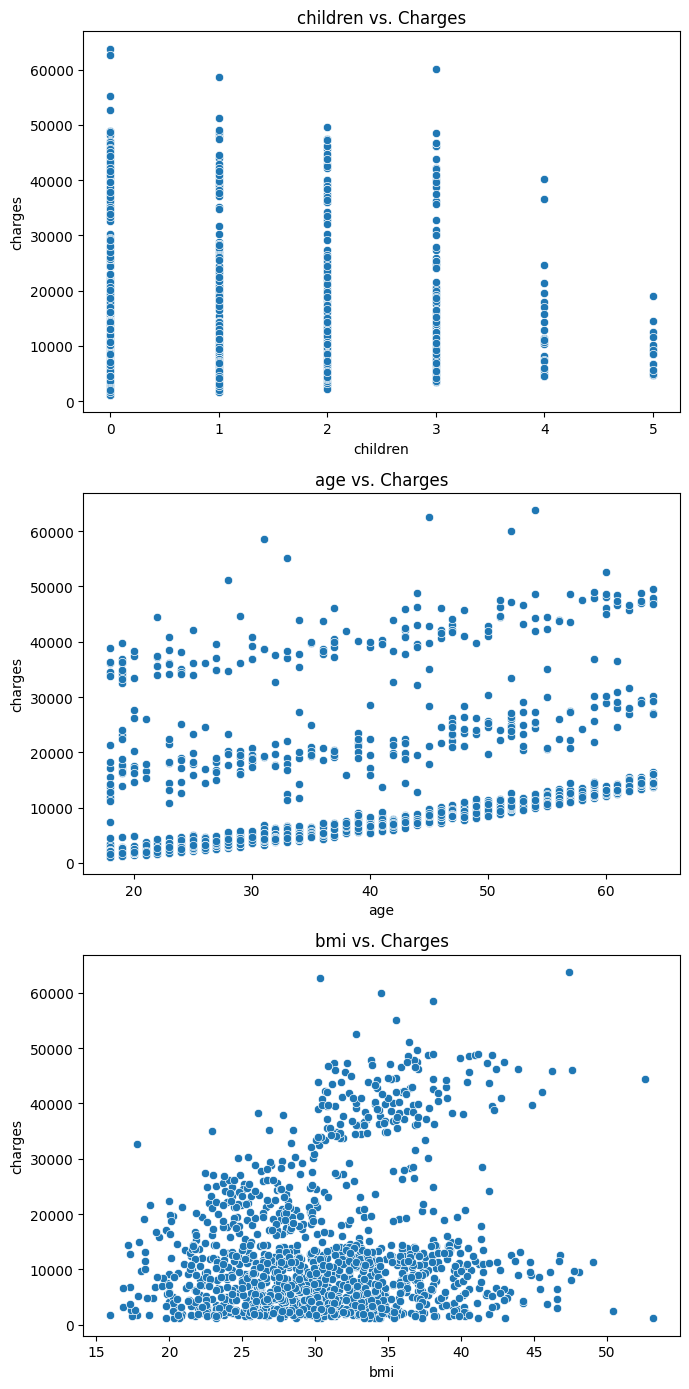

In [ ]:
features = ['children', 'age', 'bmi']
fig, ax = plt.subplots(3,1, figsize = (7,14))
ax.flatten()
for idx,col in enumerate(features):
  sns.scatterplot(data = dataset, x = col, y = "charges", ax = ax[idx])
  ax[idx].set_title(f"{col} vs. Charges")

plt.tight_layout()

<ipython-input-17-2916b7c96979>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=dataset, palette='pastel')


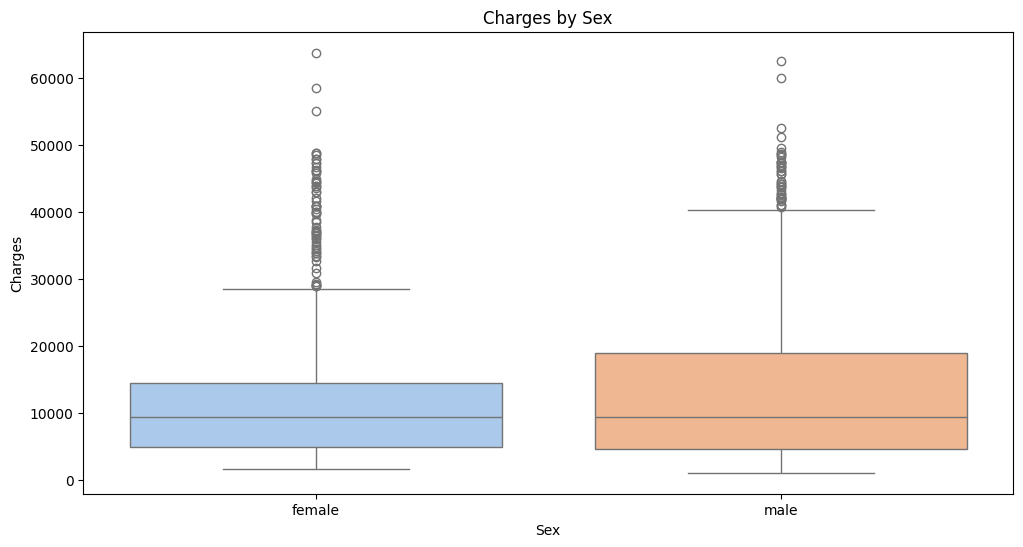

<ipython-input-17-2916b7c96979>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges', data=dataset, palette='pastel')


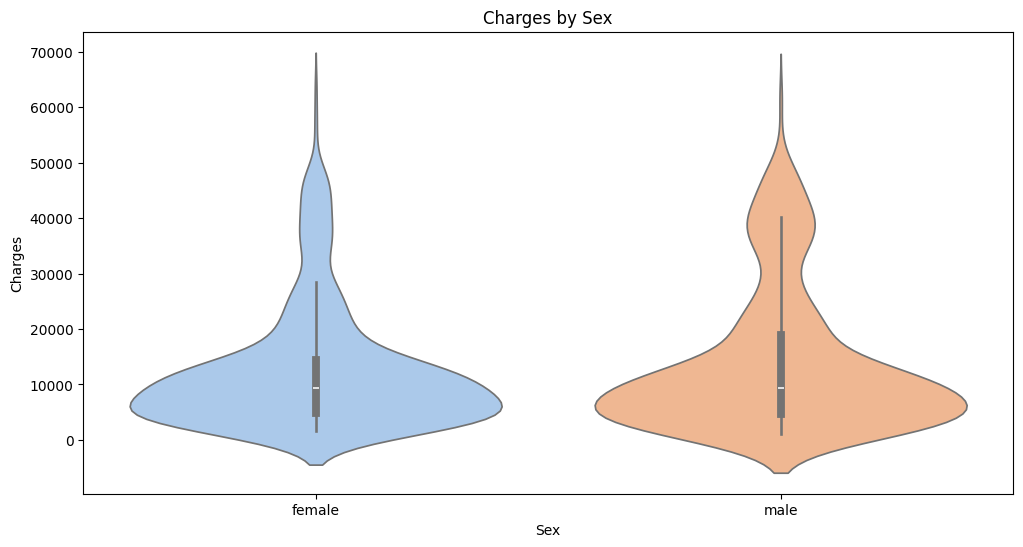

<ipython-input-17-2916b7c96979>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='sex', y='charges', data=dataset, palette='pastel', jitter=True)


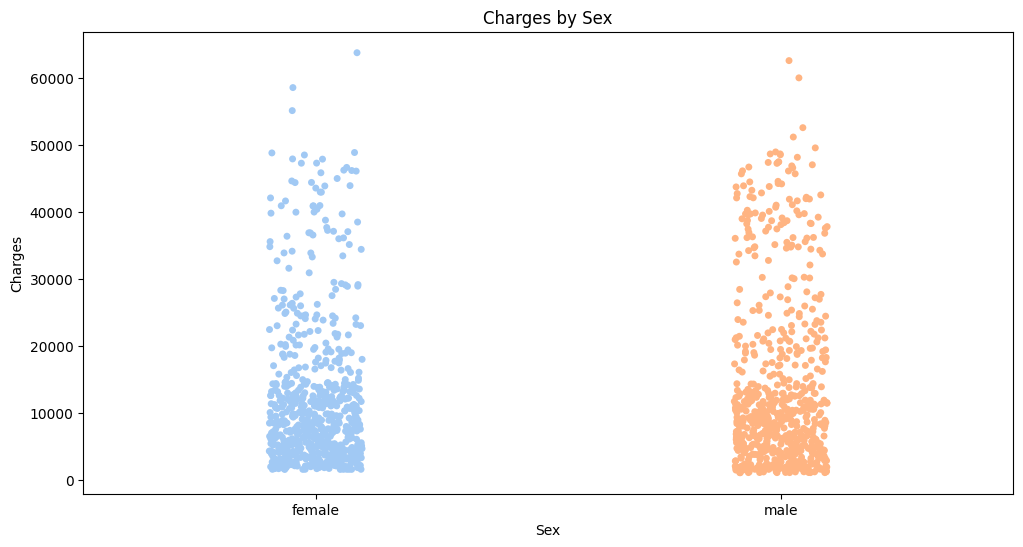

<ipython-input-17-2916b7c96979>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='sex', y='charges', data=dataset, palette='pastel')


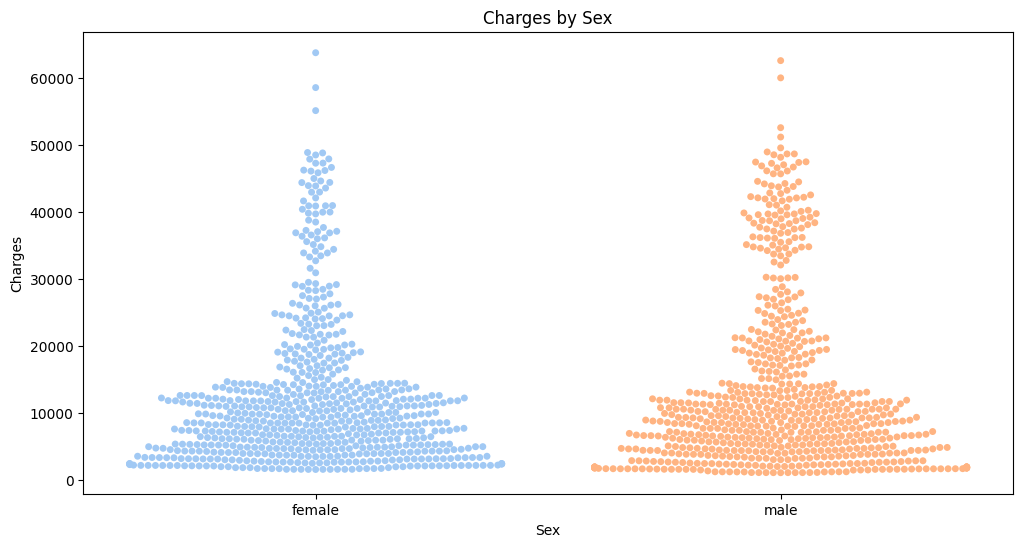

In [ ]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='charges', data=dataset, palette='pastel')
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='sex', y='charges', data=dataset, palette='pastel')
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

# Strip Plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='sex', y='charges', data=dataset, palette='pastel', jitter=True)
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

# Swarm Plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='sex', y='charges', data=dataset, palette='pastel')
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

<ipython-input-18-35f05cc2da65>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=dataset, palette='pastel')


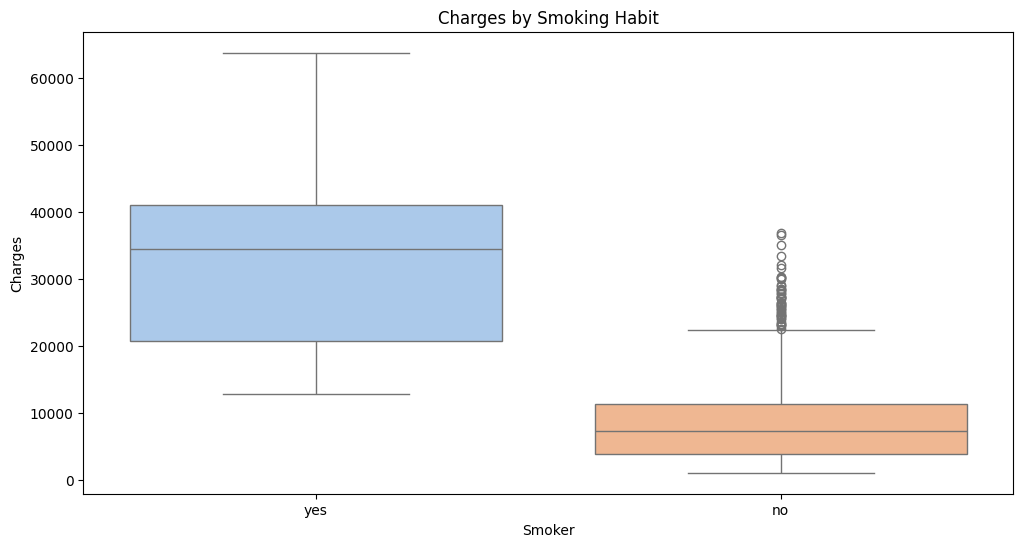

<ipython-input-18-35f05cc2da65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges', data=dataset, palette='pastel')


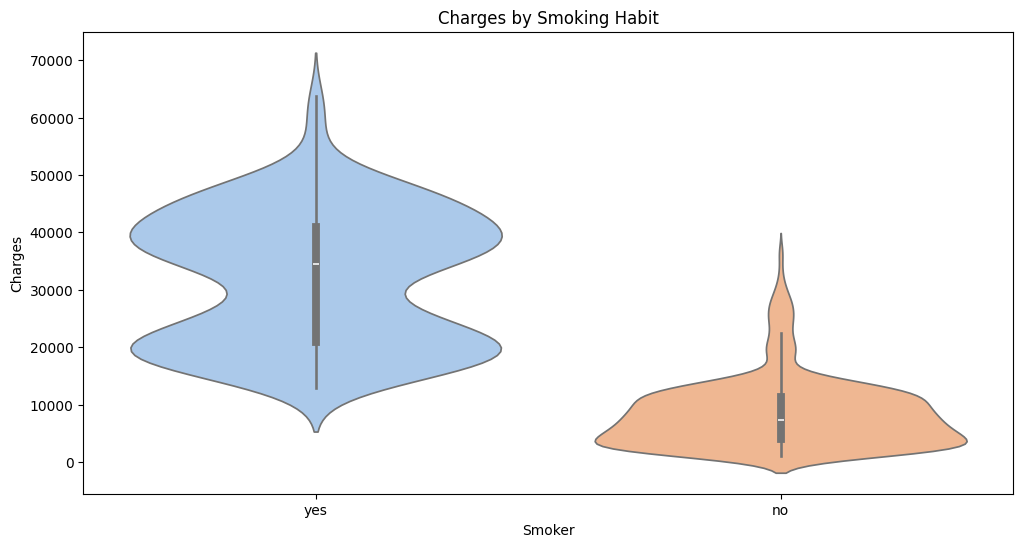

<ipython-input-18-35f05cc2da65>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='smoker', y='charges', data=dataset, palette='pastel', jitter=True)


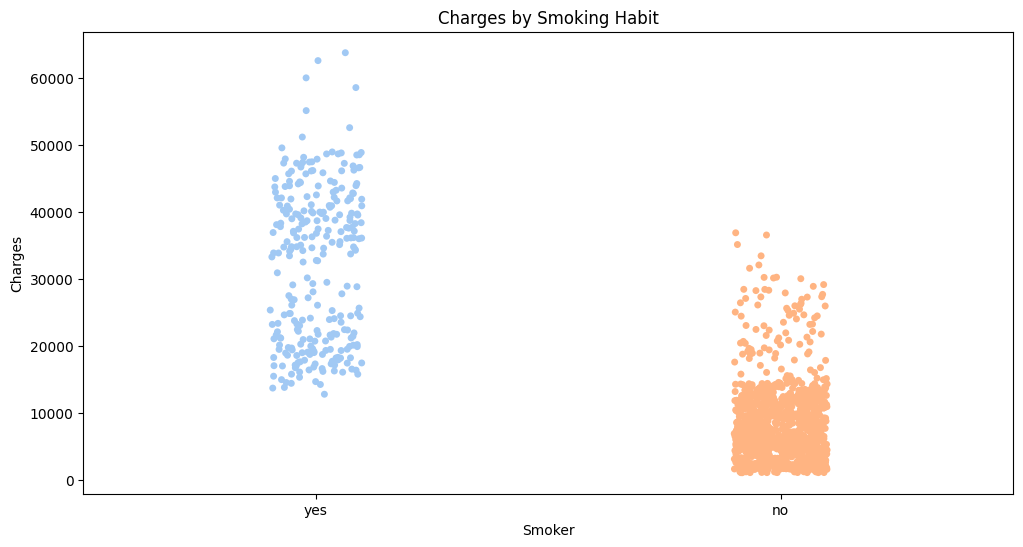

<ipython-input-18-35f05cc2da65>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='smoker', y='charges', data=dataset, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


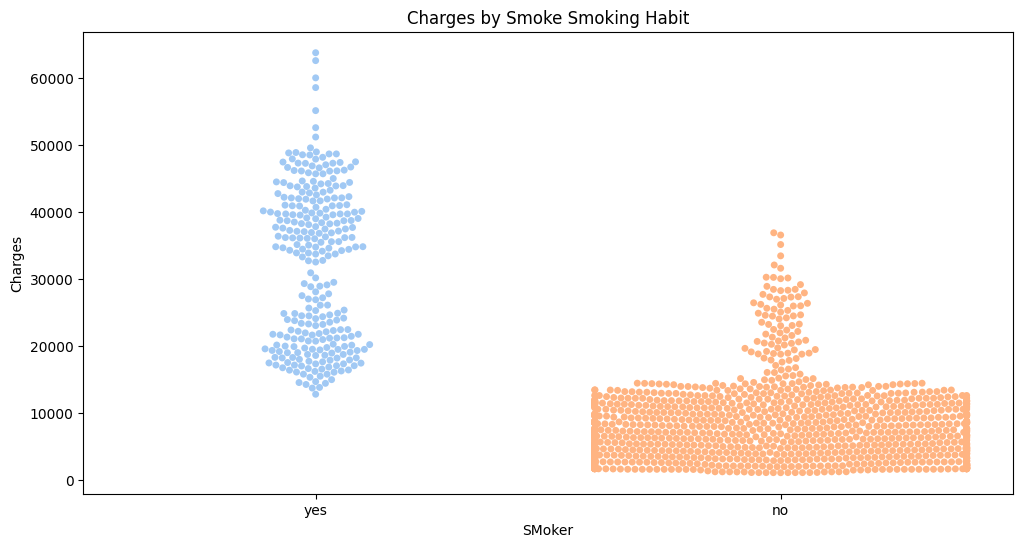

In [ ]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=dataset, palette='pastel')
plt.title('Charges by Smoking Habit')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='smoker', y='charges', data=dataset, palette='pastel')
plt.title('Charges by Smoking Habit')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Strip Plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='smoker', y='charges', data=dataset, palette='pastel', jitter=True)
plt.title('Charges by Smoking Habit')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Swarm Plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='smoker', y='charges', data=dataset, palette='pastel')
plt.title('Charges by Smoke Smoking Habit')
plt.xlabel('SMoker')
plt.ylabel('Charges')
plt.show()

<ipython-input-19-64b138cdeb03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=dataset, palette='pastel')


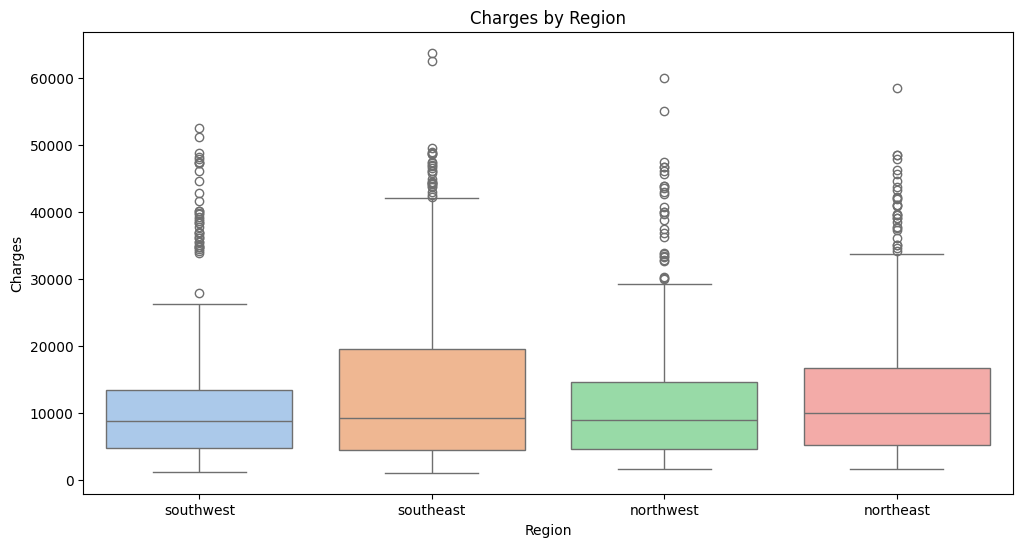

<ipython-input-19-64b138cdeb03>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='charges', data=dataset, palette='pastel')


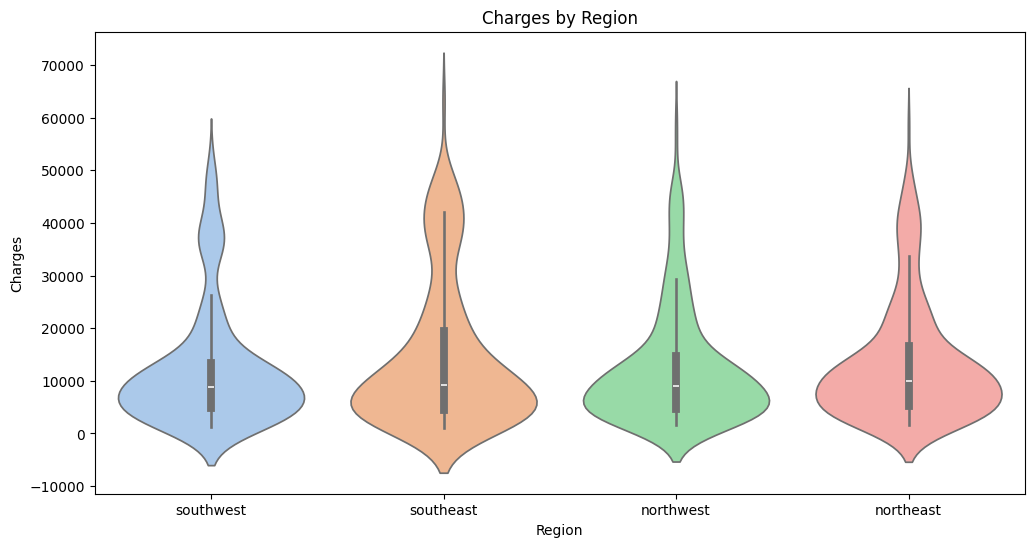

<ipython-input-19-64b138cdeb03>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='region', y='charges', data=dataset, palette='pastel', jitter=True)


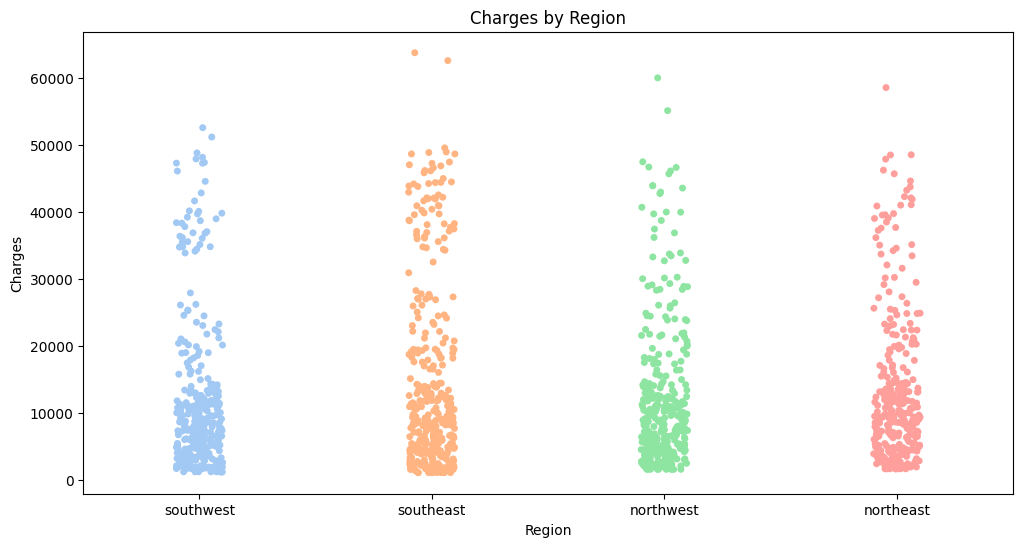

<ipython-input-19-64b138cdeb03>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='region', y='charges', data=dataset, palette='pastel')


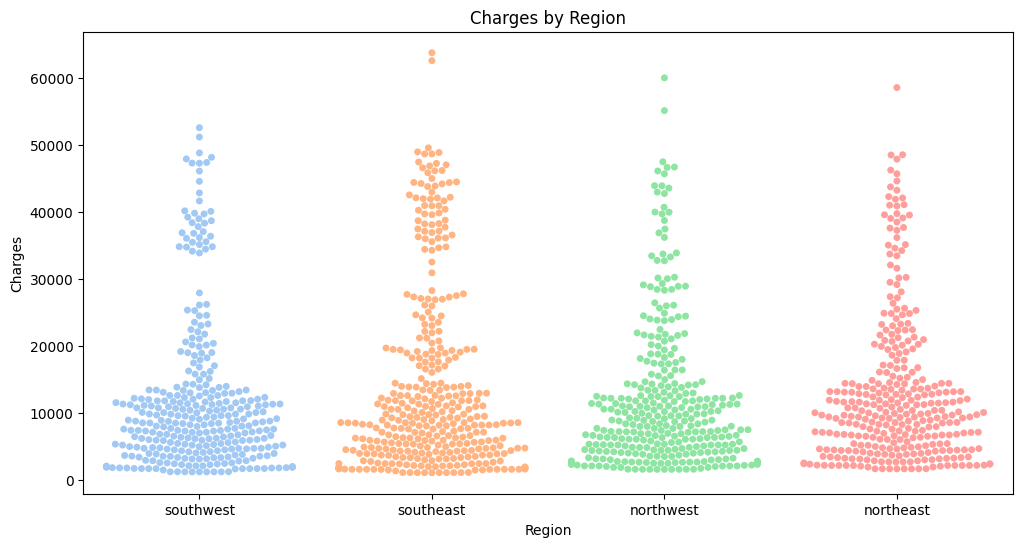

In [ ]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=dataset, palette='pastel')
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='region', y='charges', data=dataset, palette='pastel')
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Strip Plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='region', y='charges', data=dataset, palette='pastel', jitter=True)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Swarm Plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='region', y='charges', data=dataset, palette='pastel')
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

<Figure size 1000x600 with 0 Axes>

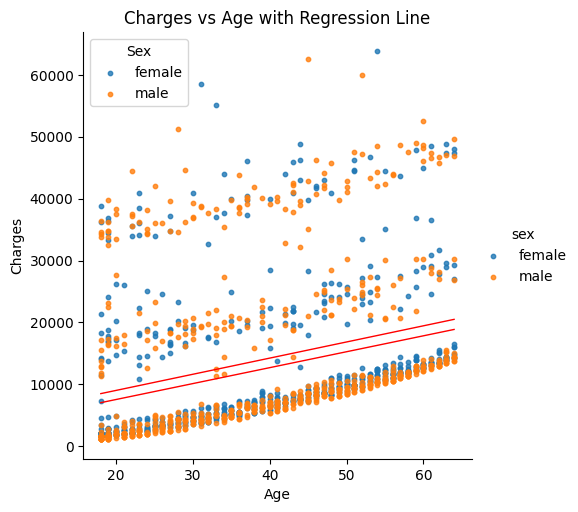

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is already defined and contains 'age', 'charges', and 'sex'

plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='charges', data=dataset, hue='sex',
           scatter_kws={'s': 10}, line_kws={'color': 'red', 'linewidth': 1}, ci=None)  # Smaller dots and thinner line
plt.title('Charges vs Age with Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Sex', loc='upper left')  # Adjust legend title and position if needed
plt.show()



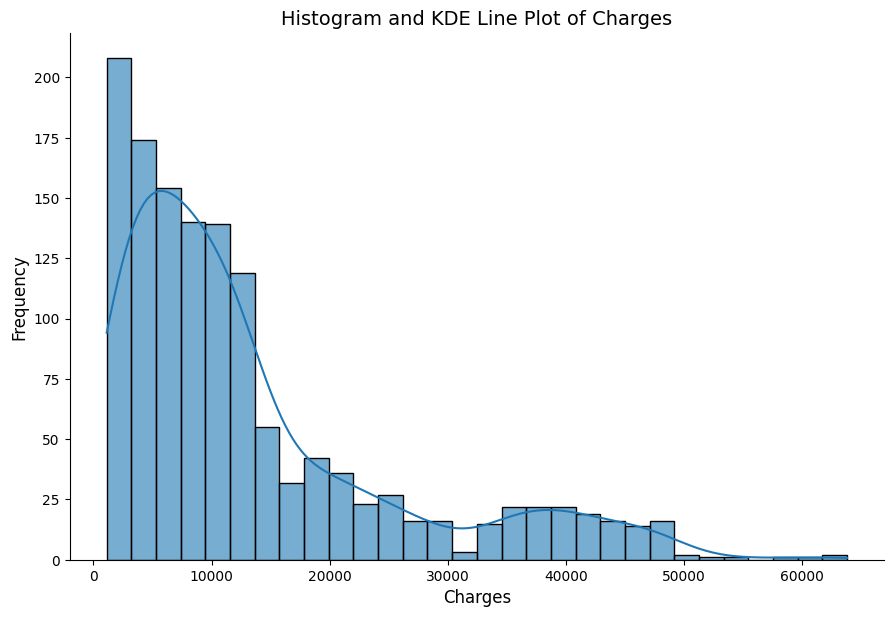

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is already defined and contains 'charges'

# Create the displot with KDE
sns.displot(dataset['charges'], kde=True, height=6, aspect=1.5, bins=30, alpha=0.6)

# Customize the axes and title
plt.xlabel('Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram and KDE Line Plot of Charges', fontsize=14)

# Show the plot
plt.show()


# Removing Outliers

In [ ]:
continuous_columns = ['age', 'bmi', 'charges', 'children']
def remove_outliers(df, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each continuous column
for col in continuous_columns:
    dataset = remove_outliers(dataset, col)

# Gaussian Mixture

In [ ]:
non_smoker = dataset[dataset['smoker'] == 'no']
x_ = non_smoker[['age', 'charges']]
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2,random_state=2)
non_smoker = non_smoker.copy()
non_smoker['cluster'] = gmm.fit_predict(x_)
dataset.loc[non_smoker.index, 'cluster'] = non_smoker['cluster']

In [ ]:
dataset

,age,sex,bmi,children,smoker,region,charges,bmi_status,cluster
0,19,female,27.900,0,yes,southwest,16884.92400,low,NaN
1,18,male,33.770,1,no,southeast,1725.55230,high,0.0
2,28,male,33.000,3,no,southeast,4449.46200,high,0.0
3,33,male,22.705,0,no,northwest,21984.47061,low,1.0
4,32,male,28.880,0,no,northwest,3866.85520,low,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,high,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,high,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,high,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,low,0.0


# Dependent & Independent Variable

In [ ]:
X = dataset.drop(columns=['charges'], axis = 1).values
y = dataset['charges'].values

In [ ]:
X

array([[19, 'female', 27.9, ..., 'southwest', 'low', nan],
       [18, 'male', 33.77, ..., 'southeast', 'high', 0.0],
       [28, 'male', 33.0, ..., 'southeast', 'high', 0.0],
       ...,
       [18, 'female', 36.85, ..., 'southeast', 'high', 0.0],
       [21, 'female', 25.8, ..., 'southwest', 'low', 0.0],
       [61, 'female', 29.07, ..., 'northwest', 'low', nan]], dtype=object)

In [ ]:
dataset.shape

(1191, 9)

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X.shape

(1191, 14)

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 27.9 0 nan]
 [0.0 1.0 1.0 ... 33.77 1 0.0]
 [0.0 1.0 1.0 ... 33.0 3 0.0]
 ...
 [1.0 0.0 1.0 ... 36.85 0 0.0]
 [1.0 0.0 1.0 ... 25.8 0 0.0]
 [1.0 0.0 0.0 ... 29.07 0 nan]]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Multiple Linear Regression model

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your original NumPy arrays

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an imputer object with the strategy to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=4)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5267.4804  4673.3922]
 [ 8910.4692  8551.347 ]
 [13148.8522 15170.069 ]
 [ 2746.1024  2261.5688]
 [ 1516.6524  1631.8212]
 [10025.0527 10141.1362]
 [ 7704.8569  7729.6457]
 [ 6790.6099  5630.4578]
 [17320.2745 33732.6867]
 [10388.7473 11015.1747]
 [ 4263.9436  3756.6216]
 [12424.3263 13143.8648]
 [10044.9323  9850.432 ]
 [ 4768.2157  4185.0979]
 [ 2486.2066  2138.0707]
 [15864.2752 14133.0377]
 [10147.7337 10422.9166]
 [11577.0528 12347.172 ]
 [25418.4523 23807.2406]
 [16751.6982 17081.08  ]
 [ 6694.656   7151.092 ]
 [ 3029.4687  2473.3341]
 [18790.226  33900.653 ]
 [10322.6648 10370.9125]
 [ 8414.9047  8823.279 ]
 [ 9033.5722  8457.818 ]
 [11047.9783 11093.6229]
 [ 6443.9663  6406.4107]
 [ 6186.9117  5415.6612]
 [ 4045.8232  4189.1131]
 [ 1022.3946  1837.237 ]
 [ 5916.5939  4320.4109]
 [ 8254.1552  7256.7231]
 [ 4514.3655  4058.1161]
 [ 8779.5836  8347.1643]
 [24921.3403 22218.1149]
 [10390.7182 10796.3502]
 [13015.7518 14043.4767]
 [ 8948.5297  8825.086 ]
 [ 2205.4134  2585.8506]


# Visualising the Linear Regression results

In [ ]:
regressor.predict(X_test)

array([ 5267.4804,  8910.4692, 13148.8522,  2746.1024,  1516.6524,
       10025.0527,  7704.8569,  6790.6099, 17320.2745, 10388.7473,
        4263.9436, 12424.3263, 10044.9323,  4768.2157,  2486.2066,
       15864.2752, 10147.7337, 11577.0528, 25418.4523, 16751.6982,
        6694.656 ,  3029.4687, 18790.226 , 10322.6648,  8414.9047,
        9033.5722, 11047.9783,  6443.9663,  6186.9117,  4045.8232,
        1022.3946,  5916.5939,  8254.1552,  4514.3655,  8779.5836,
       24921.3403, 10390.7182, 13015.7518,  8948.5297,  2205.4134,
       21599.8177,  5973.7875, 22063.7132,  5712.6618,  6759.3427,
        4749.3218, 10519.0344,  5047.9336, 11669.8521,  9259.6698,
       20937.4422, 11458.4791,  3402.3976,  5761.4277,   954.3494,
        1316.0661,  4262.5195,  1876.999 , 12640.3297, 10103.8992,
        3916.4492, 11811.774 ,  4514.0172, 23125.515 , 17013.1961,
       11999.7423, 25073.2945, 24333.3155, 16946.205 , 13101.8163,
        9880.5322, 24298.1504,  4899.7428,  8086.9555, 18864.1

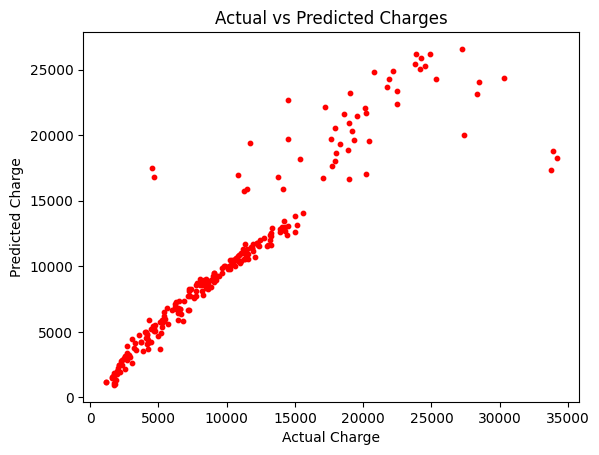

In [ ]:
plt.scatter(y_test, regressor.predict(X_test) ,color = 'red', s=10)
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charge')
plt.ylabel('Predicted Charge')
plt.show()

# Accuracy Of Test Set

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predictions on the test set
y_pred = regressor.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R²: 0.8498
Mean Absolute Error (MAE): 1243.7369
Mean Squared Error (MSE): 7053381.2946
Root Mean Squared Error (RMSE): 2655.8203


# Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 18)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.10 %
Standard Deviation: 5.54 %


# Polynomial Regression

[[ 4919.1296  4673.3922]
 [ 8435.2987  8551.347 ]
 [16135.532  15170.069 ]
 [ 3060.7353  2261.5688]
 [ 1779.2648  1631.8212]
 [ 9803.562  10141.1362]
 [ 8513.5794  7729.6457]
 [ 6147.8275  5630.4578]
 [30610.5814 33732.6867]
 [10938.1732 11015.1747]
 [ 3613.0874  3756.6216]
 [12833.144  13143.8648]
 [ 9455.2187  9850.432 ]
 [ 4149.9406  4185.0979]
 [ 2421.7292  2138.0707]
 [17520.7755 14133.0377]
 [10464.8016 10422.9166]
 [12665.1249 12347.172 ]
 [24846.1735 23807.2406]
 [16409.9112 17081.08  ]
 [ 7208.2516  7151.092 ]
 [ 3057.1728  2473.3341]
 [30773.0451 33900.653 ]
 [10509.4082 10370.9125]
 [ 9341.1694  8823.279 ]
 [ 8207.2149  8457.818 ]
 [10721.9413 11093.6229]
 [ 7257.3644  6406.4107]
 [ 5340.3888  5415.6612]
 [ 4221.2913  4189.1131]
 [ 2093.8532  1837.237 ]
 [ 4134.752   4320.4109]
 [ 7238.881   7256.7231]
 [ 4283.2681  4058.1161]
 [ 8730.3876  8347.1643]
 [22780.718  22218.1149]
 [11059.5845 10796.3502]
 [13552.87   14043.4767]
 [ 8368.9043  8825.086 ]
 [ 2494.1293  2585.8506]


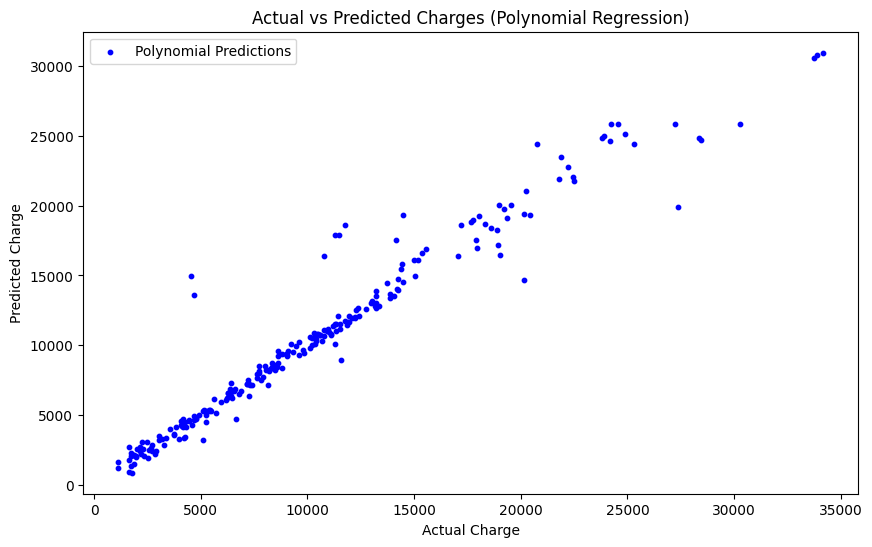

Polynomial Regression R²: 0.9422
Polynomial Regression Mean Absolute Error (MAE): 792.4478
Polynomial Regression Mean Squared Error (MSE): 2714584.0389
Polynomial Regression Root Mean Squared Error (RMSE): 1647.5995
Polynomial Regression Accuracy: 92.38 %
Polynomial Regression Standard Deviation: 5.94 %


In [ ]:
# Assuming you have already executed the previous code up to the multiple linear regression part

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score

# Polynomial Regression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

# Fit the polynomial regression model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# Predict using the polynomial regression model
y_pred_poly = lin_reg_2.predict(poly_reg.transform(X_test))

# Print actual vs predicted values
np.set_printoptions(precision=4)
print(np.concatenate((y_pred_poly.reshape(len(y_pred_poly), 1), y_test.reshape(len(y_test), 1)), 1))

# Scatter plot of actual vs predicted values for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', s=10, label='Polynomial Predictions')
plt.title('Actual vs Predicted Charges (Polynomial Regression)')
plt.xlabel('Actual Charge')
plt.ylabel('Predicted Charge')
plt.legend()
plt.show()

# Model Evaluation Metrics
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression R²: {r2_poly:.4f}")

mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"Polynomial Regression Mean Absolute Error (MAE): {mae_poly:.4f}")

mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression Mean Squared Error (MSE): {mse_poly:.4f}")

rmse_poly = np.sqrt(mse_poly)
print(f"Polynomial Regression Root Mean Squared Error (RMSE): {rmse_poly:.4f}")

# Cross-validation for polynomial regression
accuracies_poly = cross_val_score(estimator=lin_reg_2, X=X_poly, y=y_train, cv=18)
print("Polynomial Regression Accuracy: {:.2f} %".format(accuracies_poly.mean() * 100))
print("Polynomial Regression Standard Deviation: {:.2f} %".format(accuracies_poly.std() * 100))


# Support Vector Regression

X_train shape: (952, 14)
y_train shape: (952,)
R²: 0.9223
Mean Absolute Error (MAE): 0.1055
Mean Squared Error (MSE): 0.0692
Root Mean Squared Error (RMSE): 0.2631


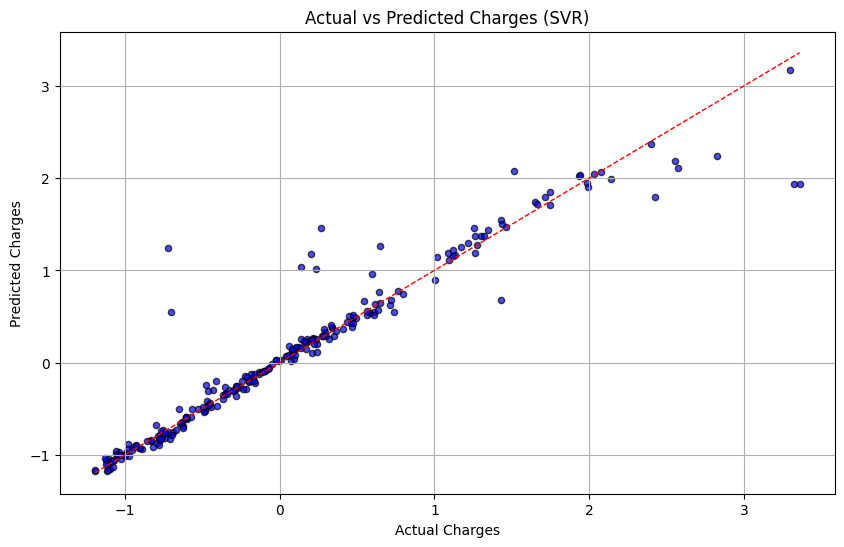

SVR Accuracy: 92.16 %
SVR Standard Deviation: 5.18 %


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming dataset is loaded and preprocessed
# X and y are already defined from your dataset

# Train-test split (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

# Reshape y_train to 2D array for scaling
y_train_reshaped = y_train.reshape(-1, 1)

# Fit and transform the training data
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train_reshaped).flatten()  # Flatten back to 1D

# Check shapes
print("X_train shape:", X_train.shape)  # Should be (n_samples, n_features)
print("y_train shape:", y_train.shape)  # Should be (n_samples,)

# Initialize and fit the SVR model
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

# Transform test data and make predictions
X_test = sc_X.transform(X_test)
y_test_reshaped = y_test.reshape(-1, 1)
y_test = sc_y.transform(y_test_reshaped).flatten()

# Predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=20)  # Adjusted size for cleanliness
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=1)  # Line for reference
plt.title('Actual vs Predicted Charges (SVR)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

# Cross-validation for SVR
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=18)
print("SVR Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("SVR Standard Deviation: {:.2f} %".format(accuracies.std() * 100))


# Decision Tree

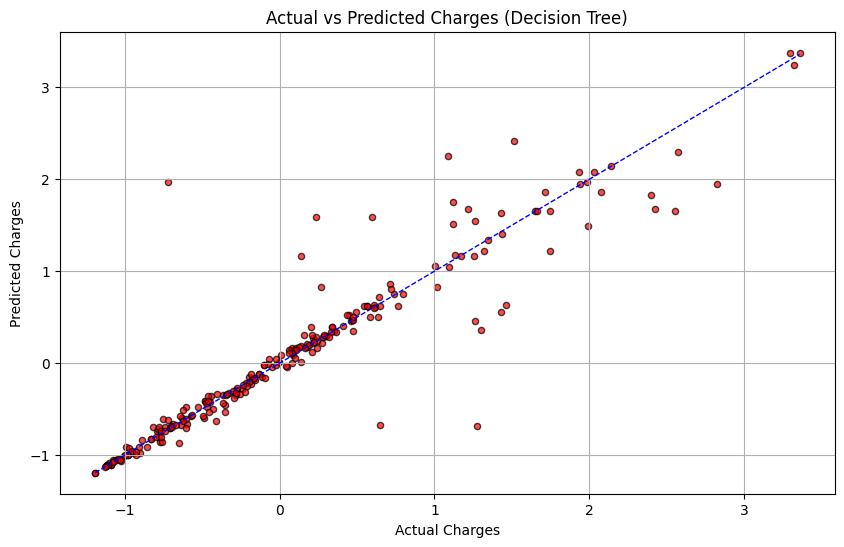

R²: 0.8732
Mean Absolute Error (MAE): 0.1325
Mean Squared Error (MSE): 0.1129
Root Mean Squared Error (RMSE): 0.3361
Decision Tree Accuracy: 87.51 %
Decision Tree Standard Deviation: 7.06 %


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming dataset is loaded and preprocessed
# X and y are already defined from your dataset

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', edgecolor='k', alpha=0.7, s=20)  # Adjusted size for cleanliness
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', linewidth=1)  # Line for reference
plt.title('Actual vs Predicted Charges (Decision Tree)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

# Evaluate the model
# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Cross-validation for Decision Tree
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=16)
print("Decision Tree Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Decision Tree Standard Deviation: {:.2f} %".format(accuracies.std() * 100))


# Random Forest

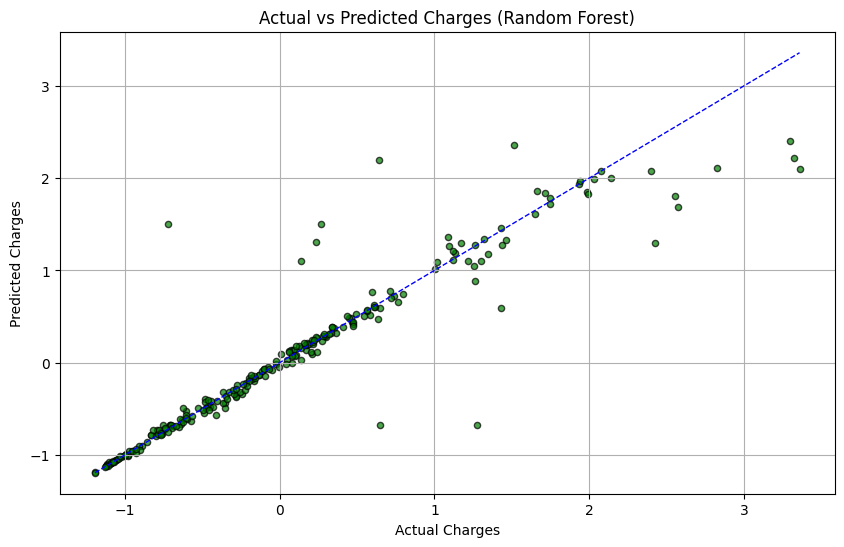

R²: 0.8791
Mean Absolute Error (MAE): 0.1199
Mean Squared Error (MSE): 0.1077
Root Mean Squared Error (RMSE): 0.3281
Random Forest Accuracy: 91.56 %
Random Forest Standard Deviation: 4.63 %


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming dataset is loaded and preprocessed
# X and y are already defined from your dataset

# Initialize the Random Forest Regressor with 10 estimators
regressor = RandomForestRegressor(n_estimators=10, random_state=0)

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.7, s=20)  # Adjusted size for cleanliness
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', linewidth=1)  # Line for reference
plt.title('Actual vs Predicted Charges (Random Forest)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

# Evaluate the model
# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Cross-validation for Random Forest
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=16)
print("Random Forest Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Random Forest Standard Deviation: {:.2f} %".format(accuracies.std() * 100))
